In [38]:
import pandas as pd 
from bertopic import BERTopic
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alicjadorobis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alicjadorobis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [39]:
df = pd.read_excel('3800_reviews_english.xlsx')

display(df)

,query,name,google_id,place_id,location_link,reviews_link,reviews,rating,review_id,review_pagination_id,...,review_rating,review_timestamp,review_datetime_utc,review_likes,reviews_id,reviews_per_score_1,reviews_per_score_2,reviews_per_score_3,reviews_per_score_4,reviews_per_score_5
0,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChdDSUhNMG9nS0VJQ0FnSUNsMV9lcHJBRRAB,CAESBkVnSUlBUQ==,...,1,1701202705,11/28/2023 20:18:25,0,8.289596e+18,13,1,1,3,16
1,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChZDSUhNMG9nS0VJQ0FnSUM1dHItVmN3EAE,CAESBkVnSUlBZw==,...,2,1697189187,10/13/2023 09:26:27,0,8.289596e+18,13,1,1,3,16
2,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChZDSUhNMG9nS0VJQ0FnSUNnc0p2aEh3EAE,CAESBkVnSUlBdw==,...,5,1512381515,12/04/2017 09:58:35,1,8.289596e+18,13,1,1,3,16
3,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChZDSUhNMG9nS0VJQ0FnSURRek5pUlJBEAE,CAESBkVnSUlCQQ==,...,1,1533110248,08/01/2018 07:57:28,2,8.289596e+18,13,1,1,3,16
4,ChIJCwHQg38JxkcRJeVtM9mPCnM,OV-Fiets,0x47c6097f83d0010b:0x730a8fd9336de525,ChIJCwHQg38JxkcRJeVtM9mPCnM,https://www.google.com/maps/place/OV-Fiets/@52...,https://search.google.com/local/reviews?placei...,34,3.2,ChdDSUhNMG9nS0VJQ0FnSURXNE5MOGtRRRAB,CAESBkVnSUlCUQ==,...,5,1647080014,03/12/2022 10:13:34,1,8.289596e+18,13,1,1,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3830,ChIJGU-a6R8XxkcR5cxWLxQYpgs,OV Fietsen,0x47c6171fe99a4f19:0xba618142f56cce5,ChIJGU-a6R8XxkcR5cxWLxQYpgs,https://www.google.com/maps/place/OV+Fietsen/@...,https://search.google.com/local/reviews?placei...,10,4.0,ChdDSUhNMG9nS0VJQ0FnSUNaal8tWTZRRRAB,CAESBkVnSUlCZw==,...,4,1695228993,09/20/2023 16:56:33,0,8.393849e+17,1,0,2,2,5
3831,ChIJGU-a6R8XxkcR5cxWLxQYpgs,OV Fietsen,0x47c6171fe99a4f19:0xba618142f56cce5,ChIJGU-a6R8XxkcR5cxWLxQYpgs,https://www.google.com/maps/place/OV+Fietsen/@...,https://search.google.com/local/reviews?placei...,10,4.0,ChdDSUhNMG9nS0VJQ0FnSUQyaUpDUTJnRRAB,CAESBkVnSUlCdw==,...,5,1651678515,05/04/2022 15:35:15,0,8.393849e+17,1,0,2,2,5
3832,ChIJGU-a6R8XxkcR5cxWLxQYpgs,OV Fietsen,0x47c6171fe99a4f19:0xba618142f56cce5,ChIJGU-a6R8XxkcR5cxWLxQYpgs,https://www.google.com/maps/place/OV+Fietsen/@...,https://search.google.com/local/reviews?placei...,10,4.0,ChdDSUhNMG9nS0VJQ0FnSUMwZzhISXF3RRAB,CAESBkVnSUlDQQ==,...,5,1570529410,10/08/2019 10:10:10,0,8.393849e+17,1,0,2,2,5
3833,ChIJGU-a6R8XxkcR5cxWLxQYpgs,OV Fietsen,0x47c6171fe99a4f19:0xba618142f56cce5,ChIJGU-a6R8XxkcR5cxWLxQYpgs,https://www.google.com/maps/place/OV+Fietsen/@...,https://search.google.com/local/reviews?placei...,10,4.0,ChZDSUhNMG9nS0VJQ0FnSUQyMDZMcldBEAE,CAESBkVnSUlDUQ==,...,4,1653385071,05/24/2022 09:37:51,0,8.393849e+17,1,0,2,2,5


In [40]:
# the data has previously been translated
#load the data into a dataframe


#removing line spacing and 'at' symbols
df = df.replace('\n',' ', regex=True)
df = df.replace('\xa0',' ', regex=True)
df.loc[df['review_text_english'].str.strip() == 'into', 'review_text_english'] = ''
# store text in a new list
#article_text = df['review_text_english'].to_list()

# check the text 
#article_text[22:]

In [41]:

import re
def remove_emojis(data):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)


df['review_text_english'] = df['review_text_english'].apply(remove_emojis)

In [42]:
#removing numbers
def remove_numbers(text):
    return re.sub(r'\d+', '', text)
df['review_text_english'] = df['review_text_english'].apply(remove_numbers)

In [43]:
def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Apply the function to the 'review_text_english' column
df['review_text_english'] = df['review_text_english'].apply(remove_punctuation)


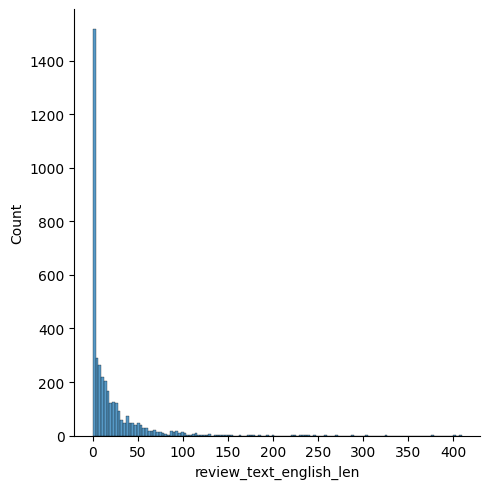

In [44]:
# Create a new column containing the length each headline text
df["review_text_english_len"] = df['review_text_english'].apply(lambda x : len(x.split()))
# Visualize the length distribution 

sns.displot(df.review_text_english_len, kde=False)

Pre-processing

In [45]:
text_list = df['review_text_english'].to_list()

#case - normalisation
def case_normalization(text):
    return text.lower()
normalized_text_list = [case_normalization(word) for word in text_list]

print(text_list)

['Watied  minutes with a guy who did not know how to work the cash register before the repairman showed up just to discover they did not repair my flat tyre of the bike I brought in the day before Lousy customer service New level of not giving a f', 'I had a flat tire and they refused to fix it because it was electric bike The back row had nothing to do with the electric part since Ive only made it electric by changing the front tire myself I had to walk an hour to find another shop after this Dont go here if you have electric bike', 'These guys were super sweet to me fixed my bike way faster than anticipated and cheap And they speak good English The whole thing cost me  euros for a new tube including the service I really recommend them', 'This place used to be good Now it is another level of I dont care  Not only they do not care about the speed of repairs they say they will call youtext you when bike is ready or when there are issues with repair Instead they just do nothing and act s

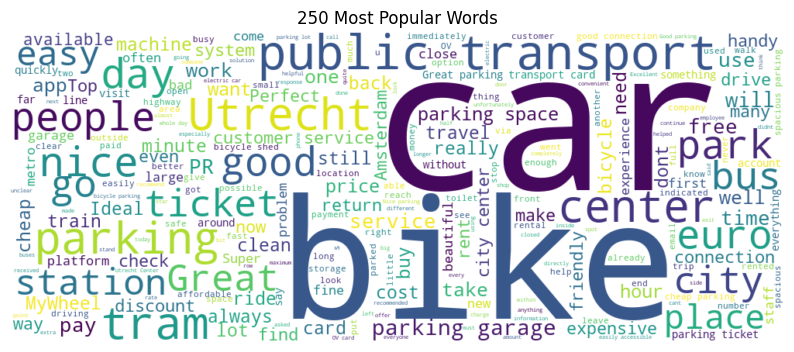

In [46]:
# words visualisation with a wordcloud
concatenated_text = ' '.join(text_list)
# generating
wordcloud = WordCloud(width=1000, height=400, max_words=250, background_color='white').generate(concatenated_text)

# plotting the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('250 Most Popular Words')
plt.show()

In [47]:
#tokenization
def tokenization(text):
    return text.split()
    
tokenized_text_list = [tokenization(word) for word in normalized_text_list]

print(tokenized_text_list)

[['watied', 'minutes', 'with', 'a', 'guy', 'who', 'did', 'not', 'know', 'how', 'to', 'work', 'the', 'cash', 'register', 'before', 'the', 'repairman', 'showed', 'up', 'just', 'to', 'discover', 'they', 'did', 'not', 'repair', 'my', 'flat', 'tyre', 'of', 'the', 'bike', 'i', 'brought', 'in', 'the', 'day', 'before', 'lousy', 'customer', 'service', 'new', 'level', 'of', 'not', 'giving', 'a', 'f'], ['i', 'had', 'a', 'flat', 'tire', 'and', 'they', 'refused', 'to', 'fix', 'it', 'because', 'it', 'was', 'electric', 'bike', 'the', 'back', 'row', 'had', 'nothing', 'to', 'do', 'with', 'the', 'electric', 'part', 'since', 'ive', 'only', 'made', 'it', 'electric', 'by', 'changing', 'the', 'front', 'tire', 'myself', 'i', 'had', 'to', 'walk', 'an', 'hour', 'to', 'find', 'another', 'shop', 'after', 'this', 'dont', 'go', 'here', 'if', 'you', 'have', 'electric', 'bike'], ['these', 'guys', 'were', 'super', 'sweet', 'to', 'me', 'fixed', 'my', 'bike', 'way', 'faster', 'than', 'anticipated', 'and', 'cheap', 'and

In [48]:
#stopwords removal 
custom_stopwords = ['also', 'said', 'one', 'per', 'get', 'could', 'would', 'ev', 'u', 'make', 'av', 'It', 'The', 'This', 'say', 'In', 'I', 'http','year', 'parking', 'center', 'utrecht', 'amsterdam', 'city', 'centre', 'ticket', 'day', 'go','also','one','first','come','take','get',]
#stopwordlist = set(['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself','yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself','they','them','their','theirs','themselves','what','which','who','whom','this','that','these','those','am','is','are','was','were','be','been','being','have','has','had','having','do','does','did','doing','a','an','the','and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','between','into','through','during','before','after','above','below','to','from','up','down','in','out','on','off','over','under','again','further','then','once','here','there','when','where','why','how','all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same','so','than','too','very','s','t','can','will','just','don','should','now'])
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english')).union(set(custom_stopwords or []))  # adding the custom stopwords and english
    return [token for token in tokens if token not in stop_words]

tokens = [remove_stopwords(word) for word in tokenized_text_list]
print(tokens)

[['watied', 'minutes', 'guy', 'know', 'work', 'cash', 'register', 'repairman', 'showed', 'discover', 'repair', 'flat', 'tyre', 'bike', 'brought', 'lousy', 'customer', 'service', 'new', 'level', 'giving', 'f'], ['flat', 'tire', 'refused', 'fix', 'electric', 'bike', 'back', 'row', 'nothing', 'electric', 'part', 'since', 'ive', 'made', 'electric', 'changing', 'front', 'tire', 'walk', 'hour', 'find', 'another', 'shop', 'dont', 'electric', 'bike'], ['guys', 'super', 'sweet', 'fixed', 'bike', 'way', 'faster', 'anticipated', 'cheap', 'speak', 'good', 'english', 'whole', 'thing', 'cost', 'euros', 'new', 'tube', 'including', 'service', 'really', 'recommend'], ['place', 'used', 'good', 'another', 'level', 'dont', 'care', 'care', 'speed', 'repairs', 'call', 'youtext', 'bike', 'ready', 'issues', 'repair', 'instead', 'nothing', 'act', 'surprised', 'show', 'ask', 'takes', 'long', 'left', 'bike', 'repair', 'thursday', 'friday', 'told', 'sorry', 'monday', 'monday', 'shop', 'course', 'message', 'bike',

In [49]:
# transforming into a string to create a model
tokens = [str(token) for token in tokens]
print(tokens)

["['watied', 'minutes', 'guy', 'know', 'work', 'cash', 'register', 'repairman', 'showed', 'discover', 'repair', 'flat', 'tyre', 'bike', 'brought', 'lousy', 'customer', 'service', 'new', 'level', 'giving', 'f']", "['flat', 'tire', 'refused', 'fix', 'electric', 'bike', 'back', 'row', 'nothing', 'electric', 'part', 'since', 'ive', 'made', 'electric', 'changing', 'front', 'tire', 'walk', 'hour', 'find', 'another', 'shop', 'dont', 'electric', 'bike']", "['guys', 'super', 'sweet', 'fixed', 'bike', 'way', 'faster', 'anticipated', 'cheap', 'speak', 'good', 'english', 'whole', 'thing', 'cost', 'euros', 'new', 'tube', 'including', 'service', 'really', 'recommend']", "['place', 'used', 'good', 'another', 'level', 'dont', 'care', 'care', 'speed', 'repairs', 'call', 'youtext', 'bike', 'ready', 'issues', 'repair', 'instead', 'nothing', 'act', 'surprised', 'show', 'ask', 'takes', 'long', 'left', 'bike', 'repair', 'thursday', 'friday', 'told', 'sorry', 'monday', 'monday', 'shop', 'course', 'message', 

In [50]:
model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7, nr_topics="auto")
review_topics, _ = model.fit_transform(tokens)

Batches: 100%|██████████| 120/120 [00:16<00:00,  7.28it/s]
2024-01-09 18:38:13,196 - BERTopic - Transformed documents to Embeddings
2024-01-09 18:38:31,303 - BERTopic - Reduced dimensionality
2024-01-09 18:38:31,427 - BERTopic - Clustered reduced embeddings
2024-01-09 18:38:31,582 - BERTopic - Reduced number of topics from 67 to 17


Topic Extraction and Representation

In [51]:
frequency = model.get_topic_info()
print("Number of topics: {}".format( len(frequency)))
display(frequency)

Number of topics: 17


,Topic,Count,Name,Representation,Representative_Docs
0,-1,859,-1_car_tram_bus_transport,"[car, tram, bus, transport, public, pr, pay, p...","[['great', 'garage', 'system', 'tickets', 'rea..."
1,0,1431,0_bike_car_public_transport,"[bike, car, public, transport, bicycle, good, ...","[['let’s', 'clear', 'good', 'inexpensive', 'ef..."
2,1,1264,1_storing_genial_commercial_outcome,"[storing, genial, commercial, outcome, modern,...","[[], [], ['place']]"
3,2,78,2_good_excellent_great_nice,"[good, excellent, great, nice, maintained, pre...","[['good'], ['good'], ['nice', 'good']]"
4,3,31,3_staff_friendly_helpful_unfriendly,"[staff, friendly, helpful, unfriendly, employe...","[['friendly', 'staff'], ['friendly', 'staff'],..."
5,4,21,4_expensive_arranged_connections_appnot,"[expensive, arranged, connections, appnot, wel...","[['great', 'expensive'], ['expensive'], ['expe..."
6,5,20,5_station_south_big_second,"[station, south, big, second, metro, amstel, t...","[['big', 'station'], ['metro', 'station'], ['s..."
7,6,19,6_ideal_visit_gain_combinatie,"[ideal, visit, gain, combinatie, competition, ...","[['ideal'], ['ideal'], ['ideal']]"
8,7,18,7_handy_useful_convenient_option,"[handy, useful, convenient, option, really, in...","[['handy'], ['really', 'useful', 'option'], ['..."
9,8,15,8_beautiful_view_port_architectural,"[beautiful, view, port, architectural, canal, ...","[['beautiful', 'space', 'beautiful', 'wall', '..."


-1 refers to all outliers and should typically be ignored. Next, let's take a look at the most frequent topic that was generated, topic 0:

In [52]:
model.get_topic(0)

[('bike', 0.028593110216312636),
 ('car', 0.022848218786792888),
 ('public', 0.02211714487289132),
 ('transport', 0.022067198107441476),
 ('bicycle', 0.020056842794794767),
 ('good', 0.019774429445954412),
 ('nice', 0.018858647897205018),
 ('tram', 0.018299537181971057),
 ('park', 0.01738515655058425),
 ('station', 0.016783840408396377)]

In [53]:
model.get_document_info(tokens)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,"['watied', 'minutes', 'guy', 'know', 'work', '...",0,0_bike_car_public_transport,"[bike, car, public, transport, bicycle, good, ...","[['let’s', 'clear', 'good', 'inexpensive', 'ef...",bike - car - public - transport - bicycle - go...,1.0,False
1,"['flat', 'tire', 'refused', 'fix', 'electric',...",0,0_bike_car_public_transport,"[bike, car, public, transport, bicycle, good, ...","[['let’s', 'clear', 'good', 'inexpensive', 'ef...",bike - car - public - transport - bicycle - go...,1.0,False
2,"['guys', 'super', 'sweet', 'fixed', 'bike', 'w...",0,0_bike_car_public_transport,"[bike, car, public, transport, bicycle, good, ...","[['let’s', 'clear', 'good', 'inexpensive', 'ef...",bike - car - public - transport - bicycle - go...,1.0,False
3,"['place', 'used', 'good', 'another', 'level', ...",0,0_bike_car_public_transport,"[bike, car, public, transport, bicycle, good, ...","[['let’s', 'clear', 'good', 'inexpensive', 'ef...",bike - car - public - transport - bicycle - go...,1.0,False
4,"['place', 'contains', 'bicycle', 'repairshop',...",0,0_bike_car_public_transport,"[bike, car, public, transport, bicycle, good, ...","[['let’s', 'clear', 'good', 'inexpensive', 'ef...",bike - car - public - transport - bicycle - go...,1.0,False
...,...,...,...,...,...,...,...,...
3830,[],1,1_storing_genial_commercial_outcome,"[storing, genial, commercial, outcome, modern,...","[[], [], ['place']]",storing - genial - commercial - outcome - mode...,1.0,True
3831,[],1,1_storing_genial_commercial_outcome,"[storing, genial, commercial, outcome, modern,...","[[], [], ['place']]",storing - genial - commercial - outcome - mode...,1.0,True
3832,[],1,1_storing_genial_commercial_outcome,"[storing, genial, commercial, outcome, modern,...","[[], [], ['place']]",storing - genial - commercial - outcome - mode...,1.0,True
3833,[],1,1_storing_genial_commercial_outcome,"[storing, genial, commercial, outcome, modern,...","[[], [], ['place']]",storing - genial - commercial - outcome - mode...,1.0,True


Top terms and c-TF-IDF scores

In [54]:
a_topic = frequency.iloc[1]["Topic"] # Select the 1st topic
model.get_topic(a_topic) # Show the words and their c-TF-IDF scores

[('bike', 0.028593110216312636),
 ('car', 0.022848218786792888),
 ('public', 0.02211714487289132),
 ('transport', 0.022067198107441476),
 ('bicycle', 0.020056842794794767),
 ('good', 0.019774429445954412),
 ('nice', 0.018858647897205018),
 ('tram', 0.018299537181971057),
 ('park', 0.01738515655058425),
 ('station', 0.016783840408396377)]

Topic visualisation


In [55]:

model.visualize_barchart(top_n_topics=6)

In [56]:
model.visualize_topics()

In [57]:
model.visualize_hierarchy(top_n_topics=30)

In [58]:
similar_topics, similarity = model.find_topics("politics", top_n = 3)
most_similar = similar_topics[0]
print("Most Similar Topic Info: \n{}".format(model.get_topic(most_similar)))
print("Similarity Score: {}".format(similarity[0]))

Most Similar Topic Info: 
[('storing', 0.9490457660649745), ('genial', 0.9490457660649745), ('commercial', 0.862465388410609), ('outcome', 0.8118452380566477), ('modern', 0.5697348622427995), ('try', 0.5639822511058049), ('works', 0.44295721486301565), ('place', 0.3045474511116675), ('', 1e-05), ('', 1e-05)]
Similarity Score: 0.15571354427100592


In [59]:
#saving the model
model.save("bert_best_model")

# loading the serialised model
my_best_model = BERTopic.load("bert_best_model")
my_best_model